<a href="https://colab.research.google.com/github/MyDearGreatTeacher/AI4high/blob/master/TF_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用 TensorFlow開發logistic regression

深度學習快速入門—使用 TensorFlow (Getting started with TensorFlow)

Giancarlo Zaccone

博碩 2017-01-10

Chapter 4  類神經網路簡介:邏輯斯迴歸（logistic regression）

注意:要用python執行

作業:改成Python 3



Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

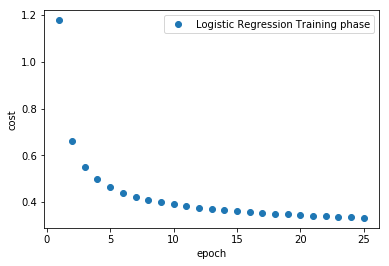

In [1]:
# Import MINST data
#import input_data

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

# Create model

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
activation = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cross_entropy = y*tf.log(activation)
cost = tf.reduce_mean\
       (-tf.reduce_sum\
        (cross_entropy,reduction_indices=1))

optimizer = tf.train.\
            GradientDescentOptimizer(learning_rate).minimize(cost)

#Plot settings
avg_set = []
epoch_set=[]

# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = \
                      mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, \
                     feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, \
                                 feed_dict={x: batch_xs, \
                                            y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost)
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
    print "Training phase finished"


    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print "Model accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels})


    plt.plot(epoch_set,avg_set, 'o', label='Logistic Regression Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
